# Taller 05 Minimos Cuadrados
## Integrantes:
## - Christian Ayala
## - Jhonn Saeteros


## A) Interpole los puntos:
$p_1 = (5.4, 3.2)$<br>
$p2_i = (9.5, 0.7)$<br>
$p_3 = (12.3, -3.6)$<br>
## De estos, el punto $p2_i$ debe ser seleccionable y movible. Cree un programa que interpole una parabola en tiempo real para los tres puntos.

## Implementacion del programa

=== INTERPOLADOR DE PARÁBOLA INTERACTIVO ===
Método: Mínimos Cuadrados

📍 PUNTOS:
  🔴 P1 (fijo): (5.4, 3.2)
  🔵 P2 (MOVIBLE): (9.5, 0.7) ← ¡ESTE LO PUEDES MOVER!
  🟢 P3 (fijo): (12.3, -3.6)


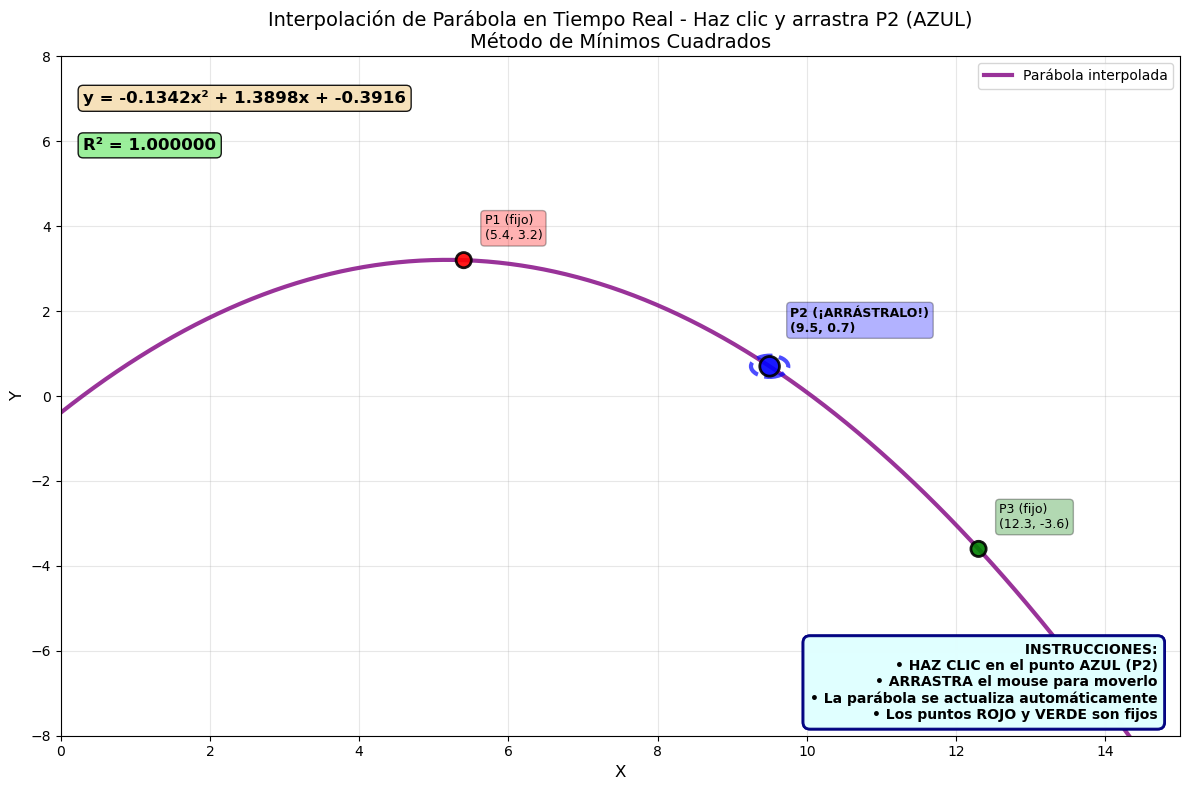

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib.patches as patches

class ParabolaInterpolator:
    def __init__(self):
        # Puntos iniciales
        self.p1 = np.array([5.4, 3.2])
        self.p2_i = np.array([9.5, 0.7])  # Punto movible
        self.p3 = np.array([12.3, -3.6])
        
        # Estado del arrastre
        self.dragging = False
        self.drag_point = None
        
        # Configurar la figura y ejes
        self.fig, self.ax = plt.subplots(figsize=(12, 8))
        
        # Configurar límites del gráfico
        self.ax.set_xlim(0, 15)
        self.ax.set_ylim(-8, 8)
        self.ax.grid(True, alpha=0.3)
        self.ax.set_xlabel('X', fontsize=12)
        self.ax.set_ylabel('Y', fontsize=12)
        self.ax.set_title('Interpolación de Parábola en Tiempo Real - Haz clic y arrastra P2 (AZUL)\n'
                         'Método de Mínimos Cuadrados', fontsize=14)
        
        # Elementos gráficos
        self.parabola_plot = None
        self.equation_text = None
        self.r_squared_text = None
        self.point_labels = []
        self.point_plots = None
        
        # Conectar eventos del mouse
        self.fig.canvas.mpl_connect('button_press_event', self.on_press)
        self.fig.canvas.mpl_connect('button_release_event', self.on_release)
        self.fig.canvas.mpl_connect('motion_notify_event', self.on_motion)
        
        # Dibujar gráfico inicial
        self.update_parabola()
        
        # Añadir instrucciones
        self.add_instructions()
        
    def distance_to_point(self, event_x, event_y, point_x, point_y):
        """Calcula la distancia entre el evento del mouse y un punto"""
        return np.sqrt((event_x - point_x)**2 + (event_y - point_y)**2)
    
    def on_press(self, event):
        """Cuando se presiona el mouse"""
        if event.inaxes != self.ax:
            return
        
        # Verificar si el clic está cerca del punto P2 (movible)
        distance = self.distance_to_point(event.xdata, event.ydata, 
                                         self.p2_i[0], self.p2_i[1])
        
        # Si está dentro del radio de detección (0.3 unidades)
        if distance < 0.5:
            self.dragging = True
            self.drag_point = self.p2_i
            # Cambiar cursor para indicar que se puede arrastrar
            self.fig.canvas.set_cursor(1)  # Hand cursor
    
    def on_motion(self, event):
        """Cuando se mueve el mouse"""
        if not self.dragging or event.inaxes != self.ax:
            return
        
        if self.drag_point is not None:
            # Actualizar posición del punto P2
            self.p2_i[0] = event.xdata
            self.p2_i[1] = event.ydata
            
            # Actualizar la parábola
            self.update_parabola()
    
    def on_release(self, event):
        """Cuando se suelta el mouse"""
        self.dragging = False
        self.drag_point = None
        # Restaurar cursor normal
        self.fig.canvas.set_cursor(0)
        
    def least_squares_parabola(self, points):
        """
        Calcula los coeficientes de una parábola y = ax² + bx + c
        usando el método de mínimos cuadrados
        """
        x_vals = points[:, 0]
        y_vals = points[:, 1]
        n = len(points)
        
        # Construir matriz del sistema de ecuaciones normales
        sum_x = np.sum(x_vals)
        sum_x2 = np.sum(x_vals**2)
        sum_x3 = np.sum(x_vals**3)
        sum_x4 = np.sum(x_vals**4)
        sum_y = np.sum(y_vals)
        sum_xy = np.sum(x_vals * y_vals)
        sum_x2y = np.sum(x_vals**2 * y_vals)
        
        # Matriz de coeficientes A
        A = np.array([
            [sum_x4, sum_x3, sum_x2],
            [sum_x3, sum_x2, sum_x],
            [sum_x2, sum_x, n]
        ])
        
        # Vector de términos independientes b
        b = np.array([sum_x2y, sum_xy, sum_y])
        
        # Resolver el sistema Ax = b
        try:
            coefficients = np.linalg.solve(A, b)
            return coefficients  # [a, b, c]
        except np.linalg.LinAlgError:
            return np.array([0, 0, np.mean(y_vals)])  # Fallback a línea horizontal
    
    def calculate_r_squared(self, points, coefficients):
        """Calcula el coeficiente de determinación R²"""
        x_vals = points[:, 0]
        y_vals = points[:, 1]
        
        # Valores predichos
        y_pred = coefficients[0] * x_vals**2 + coefficients[1] * x_vals + coefficients[2]
        
        # R² = 1 - (SS_res / SS_tot)
        ss_res = np.sum((y_vals - y_pred)**2)
        ss_tot = np.sum((y_vals - np.mean(y_vals))**2)
        
        if ss_tot == 0:
            return 1.0
        return 1 - (ss_res / ss_tot)
    
    def update_parabola(self):
        """Actualiza la parábola cuando se mueve P2"""
        # Limpiar gráfico anterior
        self.ax.clear()
        
        # Reconfigurar ejes
        self.ax.set_xlim(0, 15)
        self.ax.set_ylim(-8, 8)
        self.ax.grid(True, alpha=0.3)
        self.ax.set_xlabel('X', fontsize=12)
        self.ax.set_ylabel('Y', fontsize=12)
        self.ax.set_title('Interpolación de Parábola en Tiempo Real - Haz clic y arrastra P2 (AZUL)\n'
                         'Método de Mínimos Cuadrados', fontsize=14)
        
        # Puntos actuales
        points = np.array([self.p1, self.p2_i, self.p3])
        
        # Calcular coeficientes usando mínimos cuadrados
        coefficients = self.least_squares_parabola(points)
        a, b, c = coefficients
        
        # Calcular R²
        r_squared = self.calculate_r_squared(points, coefficients)
        
        # Generar puntos para la parábola
        x_parabola = np.linspace(0, 15, 300)
        y_parabola = a * x_parabola**2 + b * x_parabola + c
        
        # Dibujar parábola
        self.ax.plot(x_parabola, y_parabola, 'purple', 
                    linewidth=3, alpha=0.8, 
                    label='Parábola interpolada')
        
        # Dibujar puntos
        colors = ['red', 'blue', 'green']
        sizes = [120, 200, 120]  # P2 más grande
        labels = ['P1 (fijo)', 'P2 (¡ARRÁSTRALO!)', 'P3 (fijo)']
        
        # Puntos principales
        self.ax.scatter(points[:, 0], points[:, 1], 
                       c=colors, s=sizes, 
                       alpha=0.9, edgecolors='black', linewidth=2,
                       zorder=5)
        
        # Añadir un círculo extra alrededor de P2 para indicar que es interactivo
        circle_p2 = Circle((self.p2_i[0], self.p2_i[1]), 0.25, 
                          fill=False, edgecolor='blue', linewidth=3, 
                          linestyle='--', alpha=0.7, zorder=4)
        self.ax.add_patch(circle_p2)
        
        # Añadir etiquetas a los puntos
        for i, (point, label, color) in enumerate(zip(points, labels, colors)):
            offset_y = 25 if i == 1 else 15  # P2 con más offset
            self.ax.annotate(f'{label}\n({point[0]:.1f}, {point[1]:.1f})', 
                           xy=point, xytext=(15, offset_y), 
                           textcoords='offset points',
                           bbox=dict(boxstyle='round,pad=0.3', 
                                   facecolor=color, alpha=0.3),
                           fontsize=9, ha='left', fontweight='bold' if i == 1 else 'normal')
        
        # Mostrar ecuación
        equation = f'y = {a:.4f}x² + {b:.4f}x + {c:.4f}'
        self.ax.text(0.02, 0.95, equation, 
                    transform=self.ax.transAxes,
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9),
                    fontsize=12, verticalalignment='top',
                    fontweight='bold')
        
        # Mostrar R²
        r2_text = f'R² = {r_squared:.6f}'
        color_r2 = 'lightgreen' if r_squared > 0.95 else 'lightblue' if r_squared > 0.8 else 'lightyellow'
        self.ax.text(0.02, 0.88, r2_text,
                    transform=self.ax.transAxes,
                    bbox=dict(boxstyle='round', facecolor=color_r2, alpha=0.9),
                    fontsize=12, verticalalignment='top',
                    fontweight='bold')
        
        # Añadir instrucciones
        self.add_instructions()
        
        # Actualizar leyenda
        self.ax.legend(loc='upper right')
        
        # Redibujar
        self.fig.canvas.draw_idle()
    
    def add_instructions(self):
        """Añadir instrucciones en la interfaz"""
        instructions = (" INSTRUCCIONES:\n"
                       "• HAZ CLIC en el punto AZUL (P2)\n"
                       "• ARRASTRA el mouse para moverlo\n"
                       "• La parábola se actualiza automáticamente\n"
                       "• Los puntos ROJO y VERDE son fijos")
        
        self.ax.text(0.98, 0.02, instructions,
                    transform=self.ax.transAxes,
                    bbox=dict(boxstyle='round,pad=0.5', 
                             facecolor='lightcyan', alpha=0.95,
                             edgecolor='navy', linewidth=2),
                    fontsize=10, verticalalignment='bottom',
                    horizontalalignment='right', fontweight='bold')
    
    def show(self):
        """Mostrar la interfaz"""
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    # Crear y mostrar el interpolador
    interpolator = ParabolaInterpolator()
    
    print("=== INTERPOLADOR DE PARÁBOLA INTERACTIVO ===")
    print("Método: Mínimos Cuadrados")
    print("\n📍 PUNTOS:")
    print(f"  🔴 P1 (fijo): ({interpolator.p1[0]}, {interpolator.p1[1]})")
    print(f"  🔵 P2 (MOVIBLE): ({interpolator.p2_i[0]}, {interpolator.p2_i[1]}) ← ¡ESTE LO PUEDES MOVER!")
    print(f"  🟢 P3 (fijo): ({interpolator.p3[0]}, {interpolator.p3[1]})")
    
    interpolator.show()




# B) Interpole el siguiente conjunto de Datos.

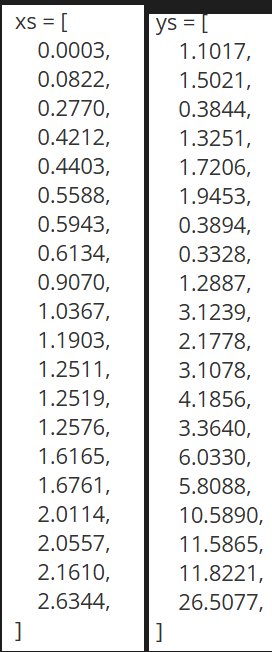